# Анализ медицинских данных

## Задание 1. Подготовка окружения и знакомство с данными

### Подгружаем DateFrame (дата-фрейм) - clinical_trial_data.csv

In [9]:
import pandas as pd

df = pd.read_csv('clinical_trial_data.csv')

### Выводим первые 5 строк дата-фрейма

In [8]:
df.head()

,PatientID,Group,Score
0,1,Placebo,60.870471
1,2,Drug,63.997831
2,3,Placebo,60.917608
3,4,Placebo,40.124311
4,5,Placebo,57.803281


По умолчанию df.head() выводит первые 5 строк. Можно передать число для вывода необходимого количества строк: df.head(10) - выводит первые 10 строк.

### Получаем данные о структуре дата-фрейма

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  200 non-null    int64  
 1   Group      200 non-null    object 
 2   Score      200 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


<class 'pandas.core.frame.DataFrame'> - объект принадлежит классу DateFrame из pandas;
RangeIndex: 200 entries, 0 to 199 - 200 записей, индексы от 0 до 199;
Затем идет информация о колонках. int64 - аналог int из python, object - str, float64 - float. 200 non-null означает то, что заполнено все 200 значений без пропусков;
memory usage указывает сколько памяти занимает дата-фрейм.

### Вывод статистической сводки по числовым столбцам

In [10]:
df.describe()

,PatientID,Score
count,200.000000,200.000000
mean,100.500000,65.267600
std,57.879185,11.088616
min,1.000000,39.748574
25%,50.750000,58.021821
50%,100.500000,65.135267
75%,150.250000,72.504527
max,200.000000,98.527315


Выводится таблица с данными:
count - количество ненулевых значений,
mean - среднее значение,
std - стандартное отклонение,
min - минимальное значение,
25%, 50%, 75% - перцентили, показывают, что 25 50 75 процентов значений лежит меньше или равно данных в таблице значений,
max - максимальное значение.

## Задание 2. Визуальный анализ

### Разделяем данные на группу, принимающих Плацебо, и на группу, принимающих Препарат.

In [38]:
placebo_group = df[df['Group'] == 'Placebo']
drug_group = df[df['Group'] == 'Drug']

print('Группа Drug:')
print(drug_group)
print('\nГруппа Placebo:')
print(placebo_group)

Группа Drug:
     PatientID Group      Score
1            2  Drug  63.997831
5            6  Drug  76.621307
9           10  Drug  50.479122
14          15  Drug  67.918777
16          17  Drug  64.106352
..         ...   ...        ...
186        187  Drug  63.002745
189        190  Drug  67.790304
195        196  Drug  46.980788
196        197  Drug  54.848089
197        198  Drug  83.668743

[100 rows x 3 columns]

Группа Placebo:
     PatientID    Group      Score
0            1  Placebo  60.870471
2            3  Placebo  60.917608
3            4  Placebo  40.124311
4            5  Placebo  57.803281
6            7  Placebo  74.778940
..         ...      ...        ...
192        193  Placebo  55.599555
193        194  Placebo  61.307406
194        195  Placebo  74.412733
198        199  Placebo  50.184913
199        200  Placebo  64.621035

[100 rows x 3 columns]


Создаем 2 дата-фрейма: placebo_group и drug_group. В каждой из них выборка соответственно Плацебо и Препарат. Данные поделились ровно по 100.

### Строим гистограмму для оценки самочувствия в каждой группе

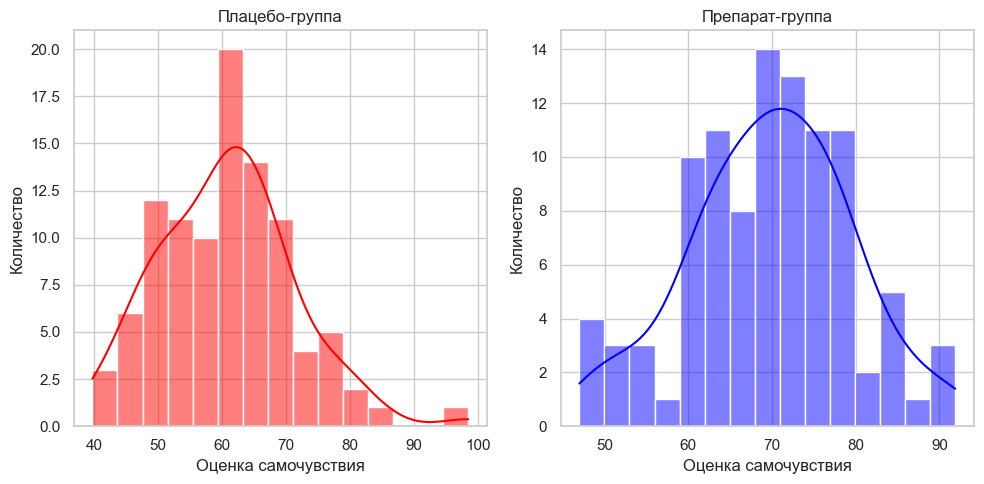

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 

sns.set(style='whitegrid')

sns.histplot(placebo_group['Score'], bins=15, kde=True, ax=axs[0], color='red')
axs[0].set_title('Плацебо-группа')
axs[0].set_ylabel('Количество')
axs[0].set_xlabel('Оценка самочувствия')

sns.histplot(drug_group['Score'], bins=15, kde=True, ax=axs[1], color='blue')
axs[1].set_title('Препарат-группа')
axs[1].set_ylabel('Количество')
axs[1].set_xlabel('Оценка самочувствия')

plt.tight_layout()
plt.show()

sns.set(style='whitegrid') - ставим сеточный стиль, данные выглядят удобнее;
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) - создали фигуру из 1 строки и 2 столбцов, придали ей размеры 10 по ширине и 5 по длине в дюймах;
sns.histplot() - построили график, передали дата-фрейм с лекарством, bins показывает количество столбиков, kde - средняя линяя значений;
plt.tight_layout() - автоматически размещает элементы графика так, чтобы ничего друг друга не перекрывало и не закрывало.

### Строим boxplot (ящик с усиками) для оценки самочувствия в каждой группе

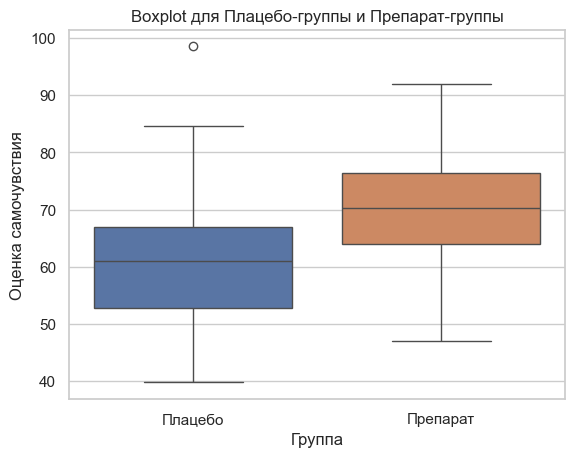

In [44]:
ax = sns.boxplot(x='Group', y='Score', hue='Group', data=df)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Плацебо', 'Препарат'])
ax.set_xlabel('Группа')
ax.set_ylabel('Оценка самочувствия')
ax.set_title('Boxplot для Плацебо-группы и Препарат-группы')

plt.show()

sns.boxplot() - строим ящик с усиками, по x - группа, по y - оценка самочувствия, hue - объединяет в группу данные.

Согласно гистограмме при приеме Препарата средняя оценка самочувствия >= 70, на Плацебо значение средне держится в пределах 60. Boxplot-график это подтверждает. Препарат влияет лучше, чем Плацебо.

## Задание 3. Математическая статистика и проверка гипотезы

### Тест Шапиро — Уилка

Это статистический тест, используемый для проверки гипотезы о нормальности распределения данных. Он позволяет оценить, насколько данные отклоняются от нормального распределения, и является одним из самых мощных тестов для этой цели. 

Тест выдает p-значение. Интерпретация следующая:
Если p-значение больше уровня значимости (обычно 0.05), то нельзя отвергнуть нулевую гипотезу, и можно считать, что данные нормально распределены.
Если p-значение меньше уровня значимости (обычно 0.05), то нужно отвергнуть нулевую гипотезу, и это свидетельствует о том, что данные не следуют нормальному распределению.

In [62]:
from scipy.stats import shapiro

drug_group_score = df[df['Group'] == 'Drug']['Score']
placebo_group_score = df[df['Group'] == 'Placebo']['Score']

print('Плацебо-группа:')
statistic, p_value = shapiro(placebo_group_score)

print(f'{statistic = :.3f}, {p_value = :.3f}.')
if p_value > 0.05:
    print('Данные имеют нормальное распределение.')
else:
    print('Данные не имеют нормального распределения.')

print('\nПрепарат-группа:')
statistic, p_value = shapiro(drug_group_score)

print(f'{statistic = :.3f}, {p_value = :.3f}.')
if p_value > 0.05:
    print('Данные имеют нормальное распределение.')
else:
    print('Данные не имеют нормального распределения.')

Плацебо-группа:
statistic = 0.981, p_value = 0.152.
Данные имеют нормальное распределение.

Препарат-группа:
statistic = 0.989, p_value = 0.618.
Данные имеют нормальное распределение.


statistic - это статистика W-теста Шапиро-Уилка, p_value - p-значение теста. Данные имеют нормальное распределение.

### Тест Левена

Это статистический тест, используемый для проверки гипотезы о равенстве дисперсий в разных группах. То есть он проверяет, есть ли статистически значимые различия в вариативности (или «разбросе») данных между группами. Тест Левена оценивает среднюю абсолютную отклоненность от медианы (или среднего) в каждой группе, а затем использует эти отклонения для проверки гипотезы о равенстве дисперсий. Это делает тест более устойчивым к отклонениям от нормальности, чем другие тесты на равенство дисперсий, такие как тест Бартлетта, который чувствителен к нормальности данных.

In [58]:
from scipy.stats import levene

statistic, p_value = levene(placebo_group_score, drug_group_score)
print(f'{statistic = :.3f}, {p_value = :.3f}.')
if p_value > 0.05:
    print('Дисперсии данных в группах примерно равны')
else:
    print('Дисперсии данных в группах различаются')


statistic = 0.380, p_value = 0.538.
Дисперсии данных в группах примерно равны


Дисперсии данных в группах примерно равны, следовательно, можно использовать t-test для независимых выборок.

### t-тест для независимых выборок (t-критерий Стьюдента)

t-тест для независимых выборок (или t-критерий Стьюдента для независимых выборок) используется для проверки гипотезы о том, что средние значения двух независимых групп одинаковы. 
Если p-значение (из таблицы t-распределения) меньше уровня значимости α (например, 0.05), то мы отвергаем нулевую гипотезу и делаем вывод, что средние значения двух групп различаются.
Если p-значение больше α, то мы не отвергаем нулевую гипотезу и приходим к выводу, что средние значения групп одинаковы.

In [61]:
from scipy.stats import ttest_ind

statistic, p_value = ttest_ind(drug_group_score, placebo_group_score)
print(f'{statistic = :.3f}, {p_value = :.9f}.')
if p_value <= 0.05:
    print('Средние значения в группах значимо отличаются')
else:
    print('Средние значения в группах не отличаются')


statistic = 6.403, p_value = 0.000000001.
Средние значения в группах значимо отличаются


Средние значения в группах значимо отличаются. Значит, прием Препарата оказывает эффективное воздействие, нежели Плацебо.

### Коэффициент Коэна

Это мера эффекта, которая используется для оценки размера различий между двумя группами в терминах стандартных отклонений. Он показывает, насколько значительно одно среднее отличается от другого относительно разброса (дисперсии) в данных. Это полезная метрика для понимания величины эффекта, когда вам нужно не просто знать, является ли различие статистически значимым, но и насколько оно важно с практической точки зрения.

In [66]:
import numpy as np

def koen_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    sd1, sd2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)
    sp = np.sqrt(((n1 - 1) * sd1**2 + (n2 - 1) * sd2**2) / (n1 + n2 - 2))
    
    return (mean1 - mean2) / sp

d = koen_d(placebo_group_score, drug_group_score)
print("Коэффициент Коэна d:", round(d, 2))

d = abs(d)
print('\nРезультат:')
if d < 0.2:
    print('Незначительный эффект (|d| < 0.2).')
elif d < 0.5:
    print('Малый эффект (0.2 ≤ |d| < 0.5).')
elif d < 0.8:
    print('Значительный эффект (0.5 ≤ |d| < 0.8).')
else:
    print('Очень большой эффект (|d| ≥ 0.8).')

Коэффициент Коэна d: -0.91

Результат:
Очень большой эффект (|d| ≥ 0.8).


Коэффициент Коэна d показал очень большой размер эффекта. Следовательно, существует значительная разница между двумя группами. Итог, Препарат эффективен.